<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/TF2_0CFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install tensorflow

In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import tensorflow as tf

In [ ]:
# additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train),(x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train,y_test =y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170498071/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


Given that your data is 2D (i.e., grayscale images with dimensions height x width), expanding the dimensions to add a channel (color dimension) is the correct approach. The shape of each image in x_train should now be (height, width, 1).

In [13]:
# the data is only 2D!
# Convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
print(x_train.shape)

(50000, 32, 32, 3, 1)


In [14]:
# Number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


#Explanation of changes:
Padding: Added padding='same' to the convolutional layers. This will ensure the output size remains the same as the input size, thus avoiding the issue of negative dimensions due to excessive downsampling.
Ensuring Dimensions:
To ensure that the dimensions are valid after each layer, let’s calculate the output shapes:

First Conv Layer:

Input shape: (height, width, channels)
Output shape: ((height + 1) // 2, (width + 1) // 2, 32)
Second Conv Layer:

Input shape: ((height + 1) // 2, (width + 1) // 2, 32)
Output shape: (((height + 1) // 2 + 1) // 2, ((width + 1) // 2 + 1) // 2, 64)
Third Conv Layer:

Input shape: (((height + 1) // 2 + 1) // 2, ((width + 1) // 2 + 1) // 2, 64)
Output shape: ((((height + 1) // 2 + 1) // 2 + 1) // 2, (((width + 1) // 2 + 1) // 2 + 1) // 2, 128)
Make sure your input image dimensions are large enough to avoid the output dimensions from becoming zero or negative. If your input images are too small, consider reducing the number of convolutional layers or using smaller strides.








In [15]:
from keras.models import Model
from keras.layers import Input, Conv2D, Flatten, Dropout, Dense

# Assuming x_train and K are already defined
input_shape = x_train[0].shape

i = Input(shape=input_shape)
x = Conv2D(32, (3, 3), strides=2, padding='same', activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, padding='same', activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, padding='same', activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [16]:
# Compile and fit
# Note: make sure

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 823s 525ms/step - loss: 1.4730 - accuracy: 0.4758 - val_loss: 1.1822 - val_accuracy: 0.5830
Epoch 2/15
1563/1563 [==============================] - 793s 508ms/step - loss: 1.1185 - accuracy: 0.6036 - val_loss: 1.0725 - val_accuracy: 0.6133
Epoch 3/15
1563/1563 [==============================] - 830s 531ms/step - loss: 0.9211 - accuracy: 0.6732 - val_loss: 1.0378 - val_accuracy: 0.6406
Epoch 4/15
1563/1563 [==============================] - 837s 536ms/step - loss: 0.7343 - accuracy: 0.7426 - val_loss: 1.0323 - val_accuracy: 0.6491
Epoch 5/15
1563/1563 [==============================] - 817s 523ms/step - loss: 0.5519 - accuracy: 0.8071 - val_loss: 1.1091 - val_accuracy: 0.6465
Epoch 6/15
1563/1563 [==============================] - 816s 522ms/step - loss: 0.3983 - accuracy: 0.8623 - val_loss: 1.1412 - val_accuracy: 0.6665
Epoch 7/15
1563/1563 [==============================] - 818s 523ms/step - loss: 0.2920 - accuracy: 0.8977 - val_

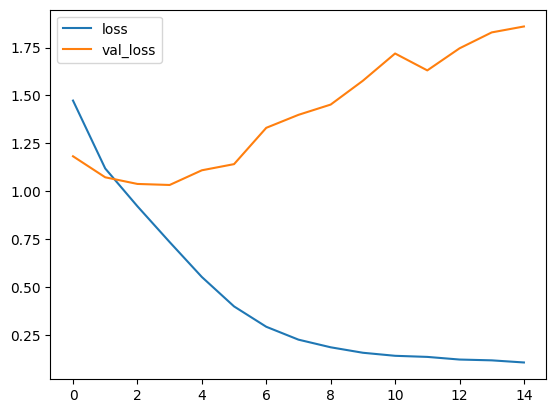

In [18]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

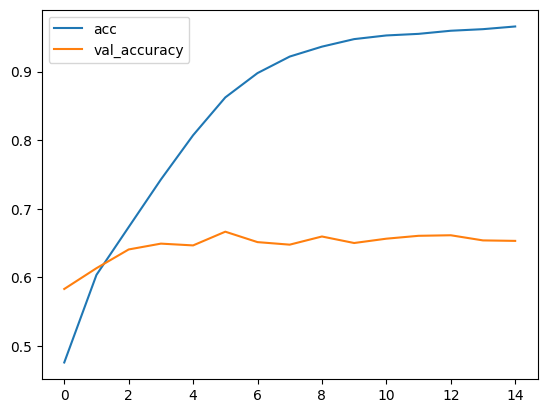

In [19]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

313/313 [==============================] - 43s 134ms/step
Confusion matrix, without normalization
[[736  31  42  17  20  14  10  23  52  55]
 [ 16 797   7  13  10   9   7  11  14 116]
 [ 74   9 540  66 107  83  55  43   5  18]
 [ 27  29  88 413  72 198  81  53  16  23]
 [ 25   6 109  39 613  46  64  74  17   7]
 [ 21  19  60 150  50 569  48  59  12  12]
 [ 12  12  50  58  97  45 676  28   6  16]
 [ 27   8  34  47  88  62  12 698   3  21]
 [ 87  48  21  21  15  18  14   5 735  36]
 [ 34 129  10  18   6  11   4  13  21 754]]


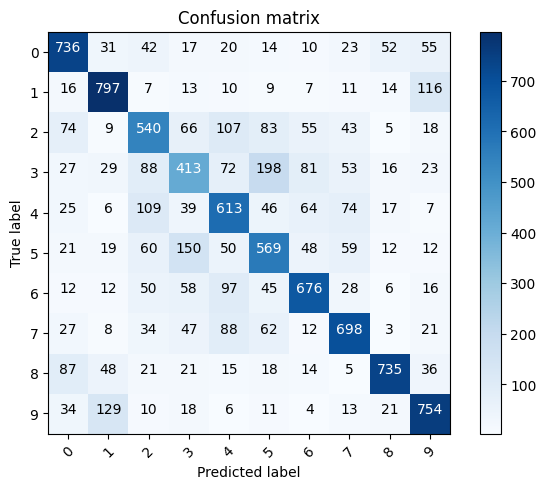

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import matplotlib.pyplot as plt

# Define the function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


# Compute the confusion matrix
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,  p_test)
plot_confusion_matrix(cm, list(range(10)))

In [21]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()


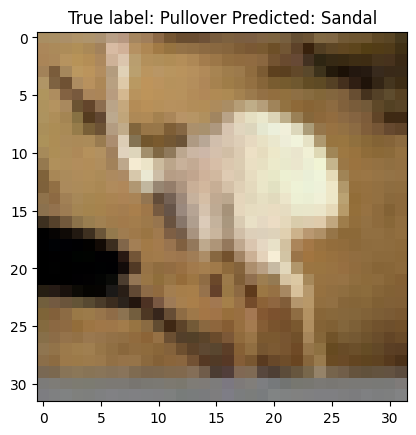

In [25]:
# Function to show misclassified examples
misclassified_idx = np.where(p_test !=  y_test)[0]
i  = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s"  % (labels[y_test[i]], labels[p_test[i]]));


